In [1]:
import pandas as pd
import seaborn as sns

# Lets us import sparse matrices
import scipy.io
import scipy.sparse
import csv


#from lets us import only a part of that package rather than the entire thing. 
#We only need the pyplot section of matplotlib so we are only importing that.
from matplotlib import pyplot as plt

#In order for plots to appear in the notebook we need this:
%matplotlib inline

In [6]:
data_dir = data_dir = "/home/ucsd-train13/cshl_2018/processed_data_rna_experiments/"
#Take a look at the string stored in the data_dir variable
data_dir
#prints out data_dir because it is the last line in the cell

'/home/ucsd-train13/cshl_2018/processed_data_rna_experiments/'

In [7]:
counts_file = data_dir+"D708.matrix.txt"
counts_file

'/home/ucsd-train13/cshl_2018/processed_data_rna_experiments/D708.matrix.txt'

In [8]:
#define function we are going to use later
def read_mtx_as_dataframe(mtx_file, columns_file, rows_file):
    """
    Reads a mtx file and returns a pandas dataframe.
    
    :param mtx_file: sparse matrix
    :param columns_file: tab-separated file containing column names
    :param rows_file: tab-separated file containing row names
    
    :return df: Pandas.DataFrame()
    """
    mat = scipy.io.mmread(mtx_file)
    columns = [
        row[0] for row in csv.reader(open(columns_file), delimiter="\t")
    ]
    rows = [
        row[0] for row in csv.reader(open(rows_file), delimiter="\t")
    ]
    df = pd.DataFrame(mat.todense(), columns=columns, index=rows)
    return df

In [13]:
#Store the dataframe with the name raw_counts
raw_counts_original = pd.read_table(data_dir+"D708.matrix.txt", header=None, index_col=0)

#Print the size of the dataframe (number of rows and columns)
print(raw_counts.shape)

#look at the first 5 rows
raw_counts.head()

(60725, 2066)


,1,2,3,4,5,6,7,8,9,10,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000272745.1,RP5-1007H16.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000118965.14,WDR35,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ENSG00000068079.7,IFI35,1,0,0,1,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
ENSG00000120509.10,PDZD11,8,6,6,2,8,6,12,3,5,...,0,0,2,0,0,1,0,0,4,0
ENSG00000274226.5,TBC1D3H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
raw_counts = raw_counts_original.drop(columns=1)
print(raw_counts.shape)
raw_counts.head()

(60725, 2065)


,2,3,4,5,6,7,8,9,10,11,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000272745.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000118965.14,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ENSG00000068079.7,1,0,0,1,2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ENSG00000120509.10,8,6,6,2,8,6,12,3,5,3,...,0,0,2,0,0,1,0,0,4,0
ENSG00000274226.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
genes_detected_per_cell = (raw_counts > 0).sum()
#makes true/false array and sums the non zero values for each row (= cell barcodes)
genes_detected_per_cell.head()

2    6603
3    5764
4    5195
5    5565
6    5416
dtype: int64

In [17]:
genes_detected_per_cell.min()
#the lowest detected gene number per cell is 1381 genes. Probably the matrix was already filtered by Peter Sim´s lab.

1381

In [30]:
genes_detected_per_cell.max()

6603

In [18]:
number_of_cells_with_genes = (raw_counts > 0).sum(axis=1)
#makes data frame with true/false values
#by default, summing of columns is performed (default is axis=0). To sum rows, set axis=1
number_of_cells_with_genes.head()

0
ENSG00000272745.1        0
ENSG00000118965.14     115
ENSG00000068079.7      349
ENSG00000120509.10    1277
ENSG00000274226.5        0
dtype: int64

In [21]:
#caluculate total number of cells
num_cells = len(raw_counts.columns)
num_cells

2065

In [23]:
#filter out genes that are expressed in less than 1% of the cells, this is approx. 20 cells
genes_to_keep = (raw_counts > 0).sum(axis=1) > 0.01*num_cells
genes_to_keep.head()

0
ENSG00000272745.1     False
ENSG00000118965.14     True
ENSG00000068079.7      True
ENSG00000120509.10     True
ENSG00000274226.5     False
dtype: bool

In [24]:
counts_filt = raw_counts.loc[genes_to_keep]
print(counts_filt.shape)
counts_filt.head()

(13503, 2065)


,2,3,4,5,6,7,8,9,10,11,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,,,,,,,,,,,,,,,,,,,,,
ENSG00000118965.14,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
ENSG00000068079.7,1,0,0,1,2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
ENSG00000120509.10,8,6,6,2,8,6,12,3,5,3,...,0,0,2,0,0,1,0,0,4,0
ENSG00000230614.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000166484.19,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
save_dir = "/home/ucsd-train13/scratch/projects/rnaSeqAnalysis/"
counts_filt.to_csv(save_dir+"counts_filt.csv")

(0, 60000)

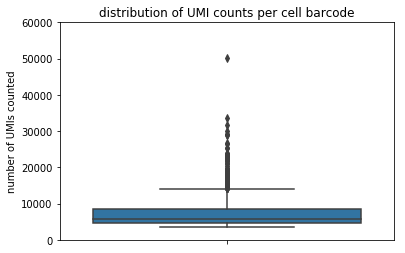

In [31]:
sns.boxplot(counts_filt.sum().values, orient = 'v')
plt.ylabel("number of UMIs counted")
plt.title("distribution of UMI counts per cell barcode")
plt.ylim([0,60000])
#boxplot

(0, 60000)

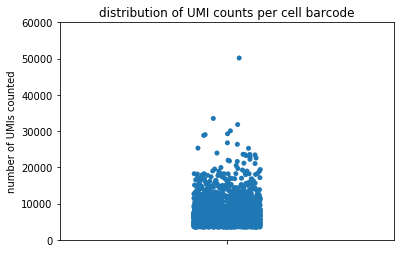

In [33]:
sns.stripplot(counts_filt.sum().values, orient = 'v', jitter=True)
plt.ylabel("number of UMIs counted")
plt.title("distribution of UMI counts per cell barcode")
plt.ylim([0,60000])
#jitterplot

(0, 60000)

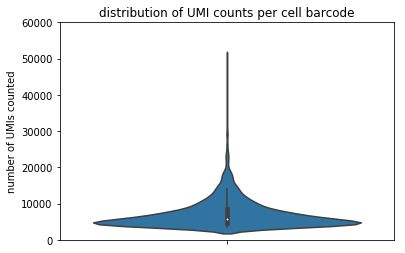

In [36]:
sns.violinplot(counts_filt.sum(axis=0), orient='v')
plt.ylabel("number of UMIs counted")
plt.title ("distribution of UMI counts per cell barcode")
plt.ylim([0,60000])